In [15]:
import uproot, numpy as np

In [16]:
def load_file(filename, treename):
    file = uproot.open(filename)
    tree = file[treename]

    df = tree.arrays(
        [
            "success",
            "trueNuEnergy",
            "trueNuHits",
            "sliceHits_U",
            "sliceHits_V",
            "sliceHits_W",
            "sliceNuHits_U",
            "sliceNuHits_V",
            "sliceNuHits_W",
            "sliceCRHits_U",
            "sliceCRHits_V",
            "sliceCRHits_W",
            "missingNuHits_U",
            "missingNuHits_V",
            "missingNuHits_W",
            "nuSliceComp_U",
            "nuSliceComp_V",
            "nuSliceComp_W",
            "nuSlicePur_U",
            "nuSlicePur_V",
            "nuSlicePur_W",
            "hitTagCorrectPct_U",
            "hitTagCorrectPct_V",
            "hitTagCorrectPct_W",
            "trueNuHitsInSlice_U",
            "trueNuHitsInSlice_V",
            "trueNuHitsInSlice_W"
        ],
        library="pd",
    )
    file.close()

    return df

In [17]:
import os

def save_plot(fig, filename, subdir=None):
    if subdir is None:
        subdir = ""
    elif subdir.startswith("/"):
        subdir = subdir[1:]
        
    if not os.path.exists('images'):
        os.mkdir('images')
    for img_type in [ "png", "svg", "eps", "pdf" ]:
        if not os.path.exists(f'images/{img_type}'):
            os.mkdir(f'images/{img_type}')
        if not os.path.exists(f'images/{img_type}/{subdir}'):
            os.mkdir(f'images/{img_type}/{subdir}')
        fig.savefig(f'images/{img_type}/{subdir}/{filename}.{img_type}', dpi=200, facecolor='w')

In [33]:
labelsize = 14
titlesize = 18

import matplotlib.pyplot as plt
import matplotlib.ticker as tck


def plot_percentage(title, data_list, file_prefix, scale=True):
    fig, ax = plt.subplots(figsize=(12, 8))
    bins = np.linspace(0.0, 1.0, 101)

    for name, data in data_list:
        # If we want to scale the distributions to the same area
        if scale:
            weights = np.ones_like(data) / len(data)
        else:
            weights = None

        ax.hist(data, bins=bins, weights=weights, histtype="step", lw=2, label=name)
        print(f"{name}: {np.mean(data):.2f} +/- {np.std(data):.2f}")

    ax.set_title(title, fontsize=titlesize)
    ax.tick_params(axis="x", labelsize=labelsize)
    ax.tick_params(axis="y", labelsize=labelsize)
    ax.set_xlabel("Fraction (%)", fontsize=titlesize)
    ax.set_ylabel("f", fontsize=titlesize)
    ax.legend(fontsize=titlesize)

    fig.tight_layout()
    plt.show()
    save_plot(fig, f"{file_prefix}")


def plot_range(title, data_list, file_prefix, min, max, nbins, scale=True, logy=False):
    fig, ax = plt.subplots(figsize=(12, 8))
    bins = np.linspace(min, max, nbins)

    for name, data in data_list:
        # If we want to scale the distributions to the same area
        if scale:
            weights = np.ones_like(data) / len(data)
        else:
            weights = None

        ax.hist(data, bins=bins, weights=weights, histtype="step", lw=2, label=name)
        print(f"{name}: {np.mean(data):.2f} +/- {np.std(data):.2f}")

    ax.set_title(title, fontsize=titlesize)
    ax.tick_params(axis="x", labelsize=labelsize)
    ax.tick_params(axis="y", labelsize=labelsize)
    ax.set_ylabel("f", fontsize=titlesize)

    if logy:
        ax.set_yscale("log")

    ax.legend(fontsize=titlesize)

    fig.tight_layout()
    plt.show()
    save_plot(fig, f"{file_prefix}")

In [19]:
dl_df = load_file('/home/ryan/Downloads/Work/rearrangement/default/slice_ub_dl_default.root', 'slices')
rearrange_df = load_file('/home/ryan/Downloads/Work/rearrangement/cheated_rearrange/slice_ub_dl_CHEATED.root', 'slices')
cheated_df = load_file('/home/ryan/Downloads/Work/rearrangement/cheated_slicing/slice_ub_dl_CHEATED_SLICING.root', 'slices')

In [20]:
print(len(dl_df[dl_df.success == 1]), len(rearrange_df[rearrange_df.success == 1]), len(cheated_df[cheated_df.success == 1]))

244209 241810 64885


Completeness (DL): 0.59 +/- 0.41
Completeness (Rearrangement): 0.62 +/- 0.41
Completeness (Cheated): 0.91 +/- 0.15


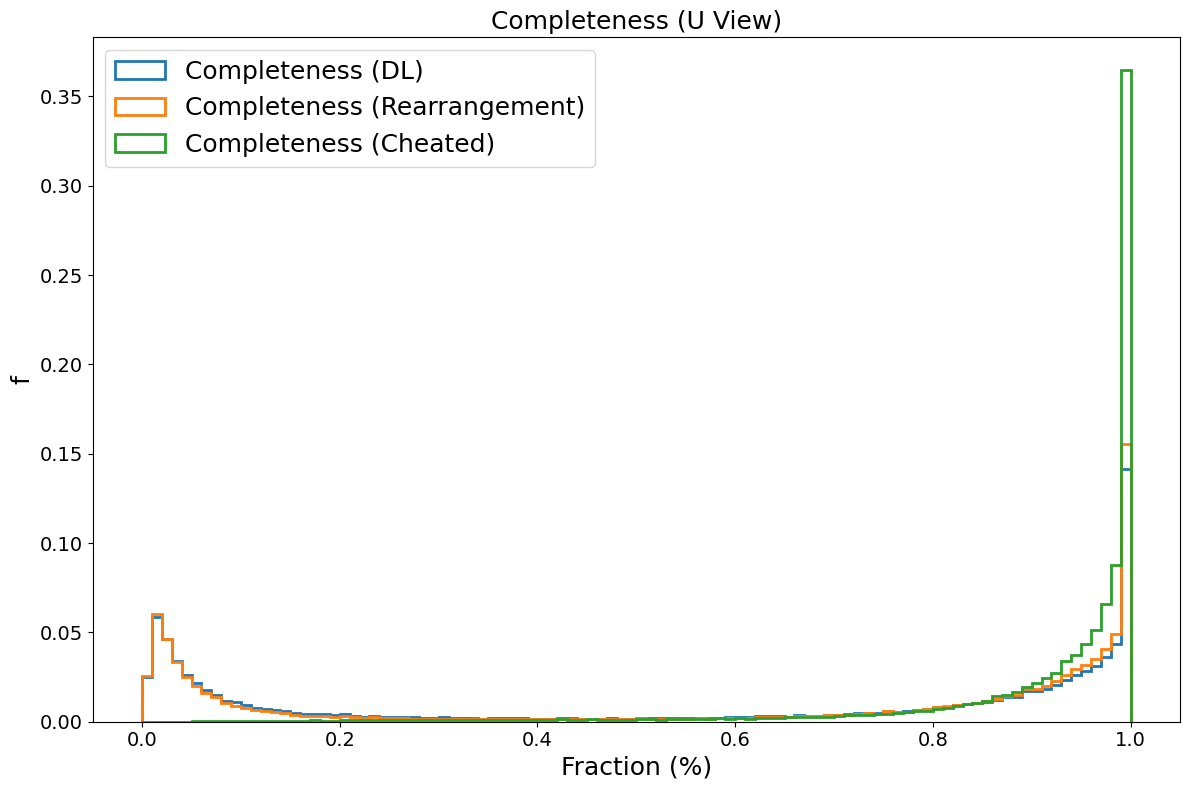

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Completeness (DL): 0.57 +/- 0.42
Completeness (Rearrangement): 0.60 +/- 0.42
Completeness (Cheated): 0.91 +/- 0.15


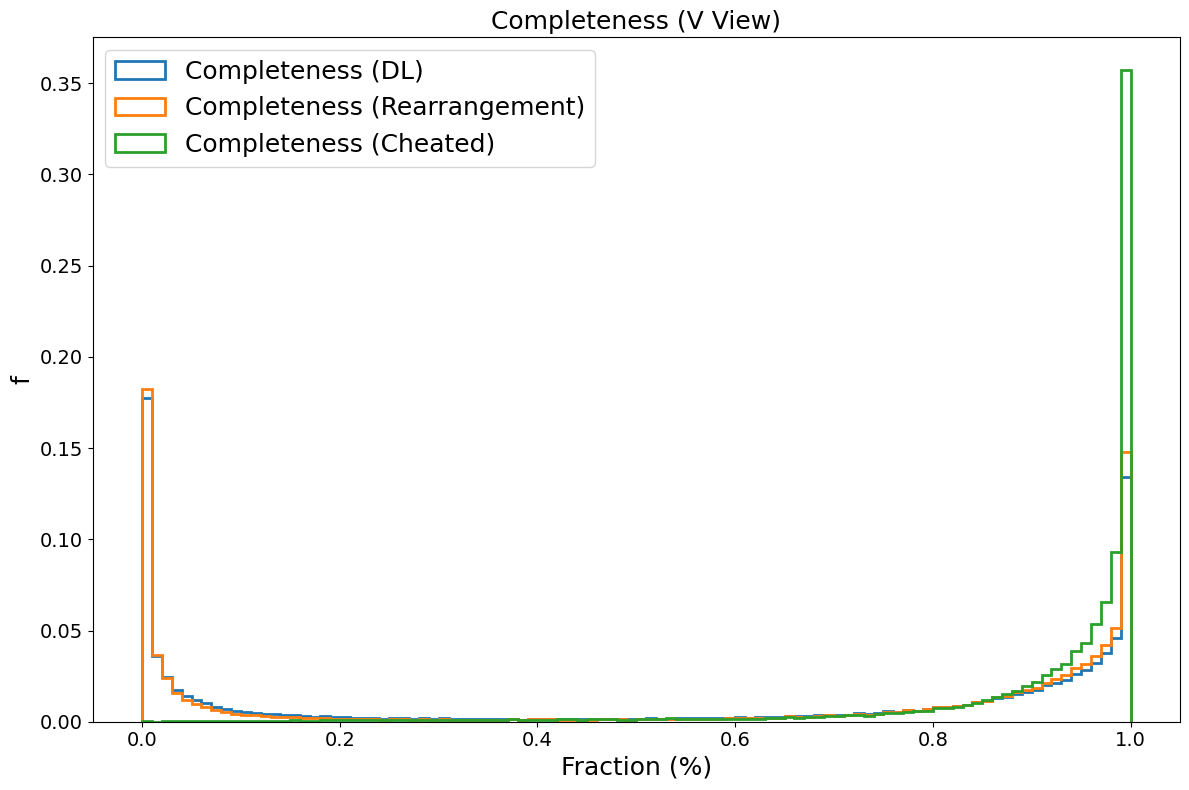

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Completeness (DL): 0.61 +/- 0.44
Completeness (Rearrangement): 0.64 +/- 0.44
Completeness (Cheated): 0.96 +/- 0.12


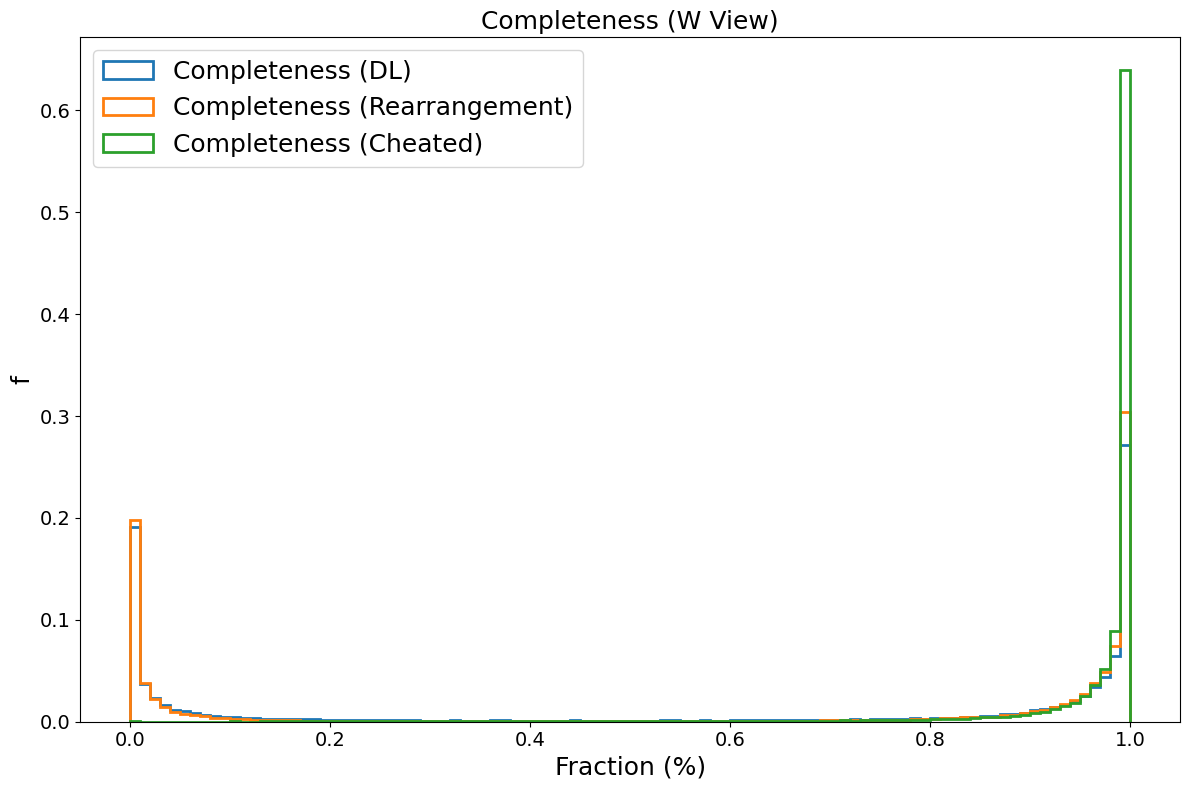

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [21]:
for view in ["U", "V", "W"]:
    completeness = [
        ("Completeness (DL)", dl_df[(dl_df.success == 1) & (dl_df.sliceNuHits_U > 5)][f"nuSliceComp_{view}"]),
        ("Completeness (Rearrangement)", rearrange_df[(rearrange_df.success == 1) & (rearrange_df.sliceNuHits_U > 5)][f"nuSliceComp_{view}"]),
        ("Completeness (Cheated)", cheated_df[(cheated_df.success == 1) & (cheated_df.sliceNuHits_U > 5)][f"nuSliceComp_{view}"]),
    ]
    plot_percentage(f"Completeness ({view} View)", completeness, f"completeness_{view}")

Purity (DL): 0.55 +/- 0.36
Purity (Rearrangement): 0.54 +/- 0.37


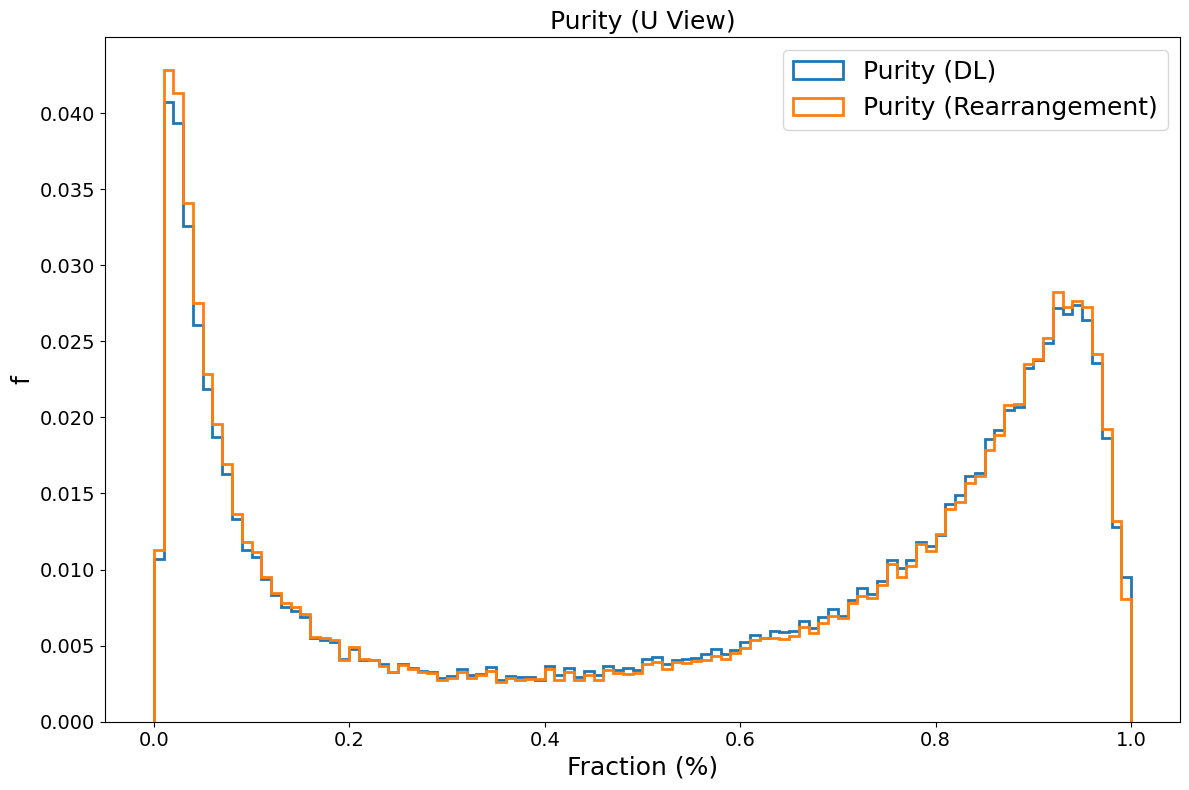

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Purity (DL): 0.65 +/- 0.35
Purity (Rearrangement): 0.64 +/- 0.36


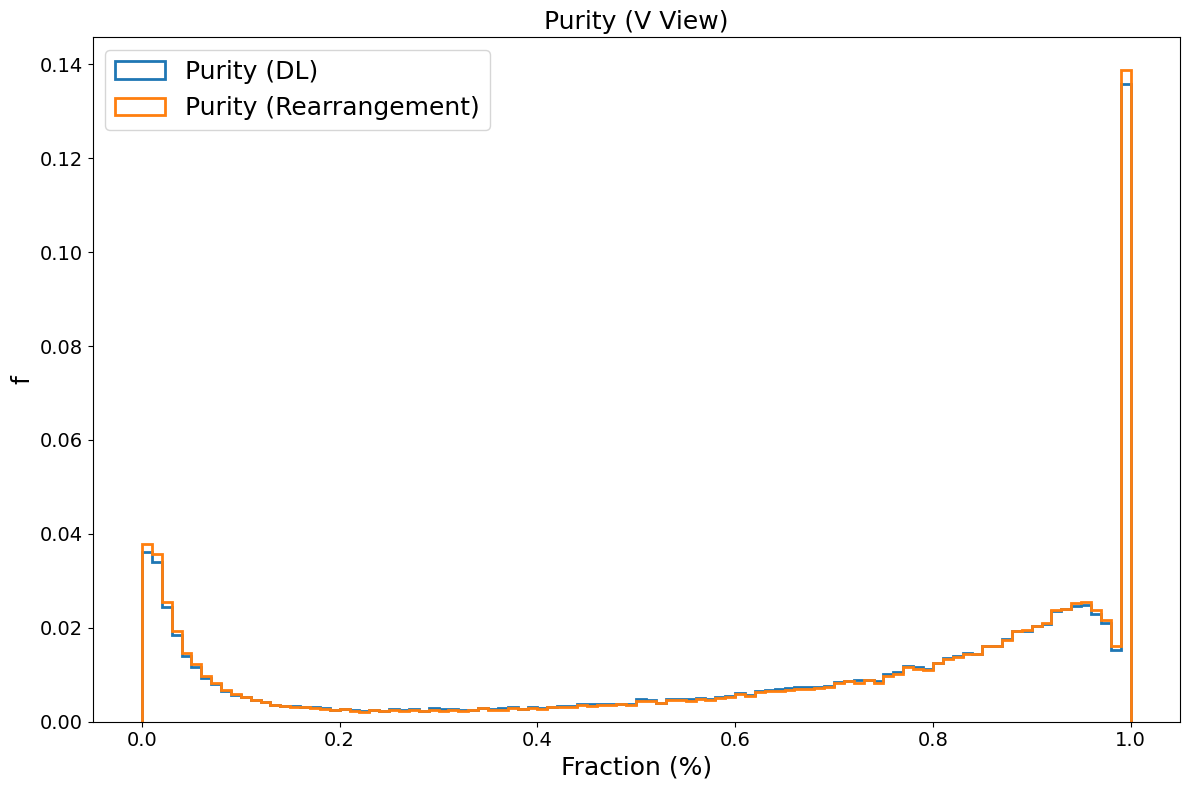

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Purity (DL): 0.72 +/- 0.35
Purity (Rearrangement): 0.72 +/- 0.35


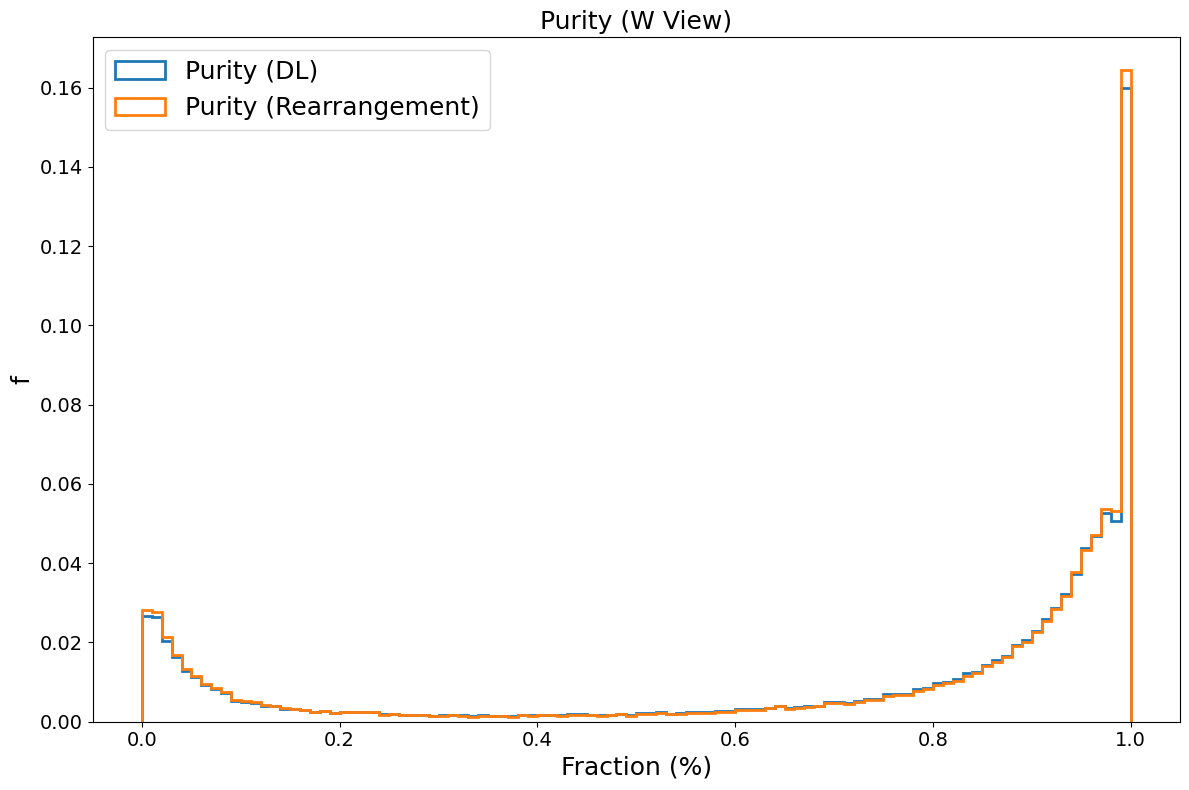

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [22]:
for view in ["U", "V", "W"]:
    purity = [
        ("Purity (DL)", dl_df[(dl_df.success == 1) & (dl_df.sliceNuHits_U > 5)][f"nuSlicePur_{view}"]),
        ("Purity (Rearrangement)", rearrange_df[(rearrange_df.success == 1) & (rearrange_df.sliceNuHits_U > 5)][f"nuSlicePur_{view}"]),
        # ("Purity (Cheated)", cheated_df[(cheated_df.success == 1) & (cheated_df.sliceNuHits_U > 5)][f"nuSlicePur_{view}"]),
    ]
    plot_percentage(f"Purity ({view} View)", purity, f"purity_{view}")

Completeness (DL): 0.24 +/- 0.39
Completeness (Rearrangement): 0.24 +/- 0.39
Completeness (Cheated): 0.91 +/- 0.17


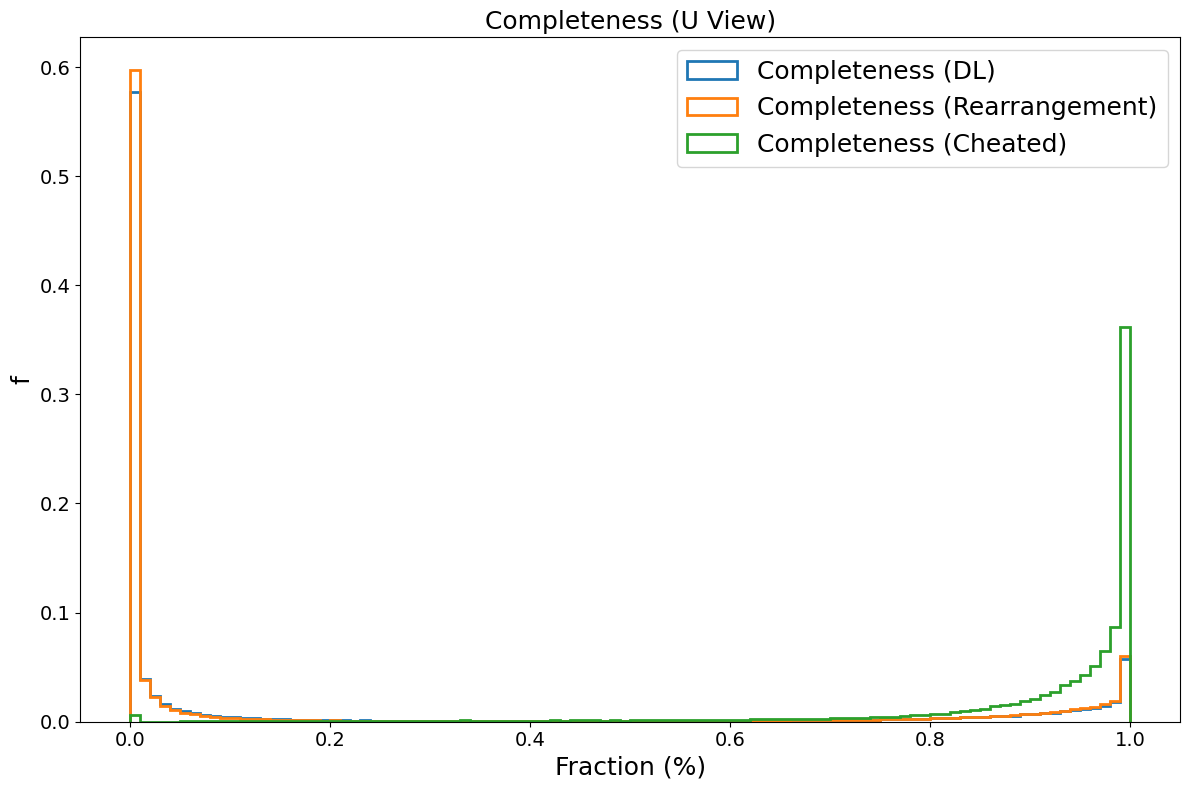

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Completeness (DL): 0.24 +/- 0.39
Completeness (Rearrangement): 0.24 +/- 0.39
Completeness (Cheated): 0.91 +/- 0.17


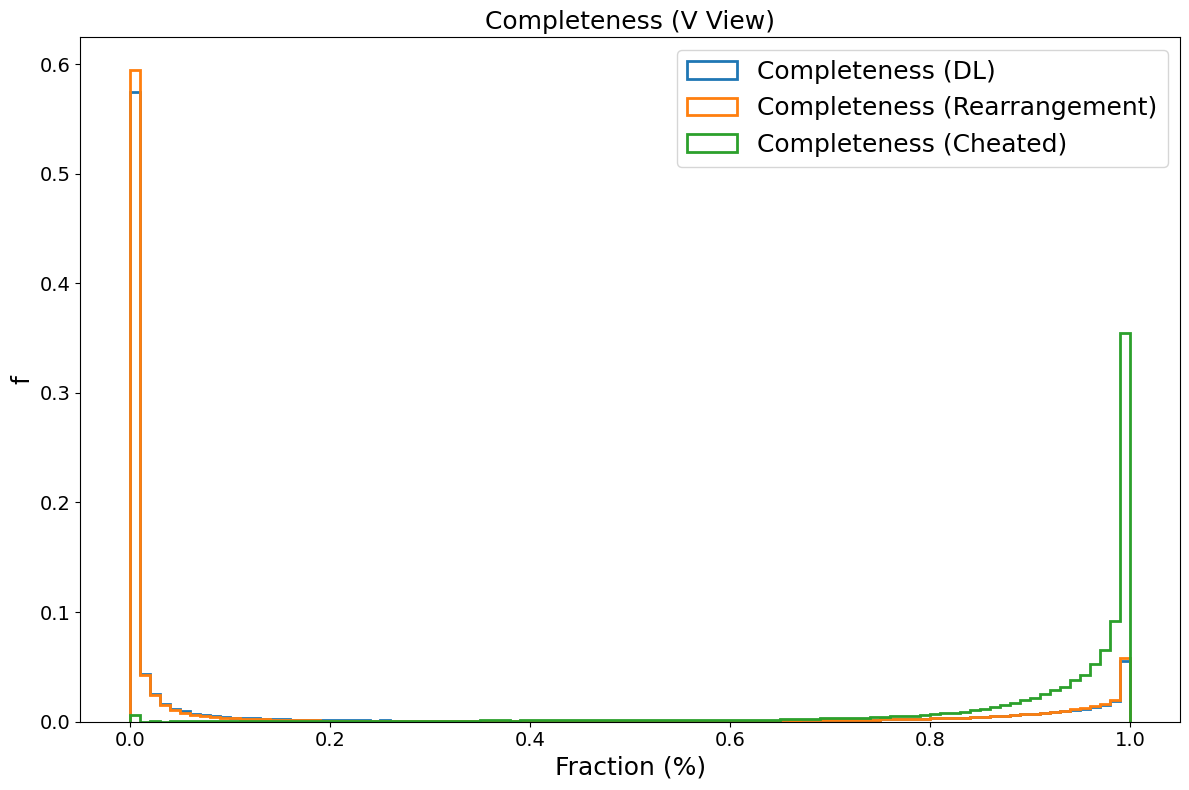

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Completeness (DL): 0.25 +/- 0.41
Completeness (Rearrangement): 0.25 +/- 0.42
Completeness (Cheated): 0.95 +/- 0.14


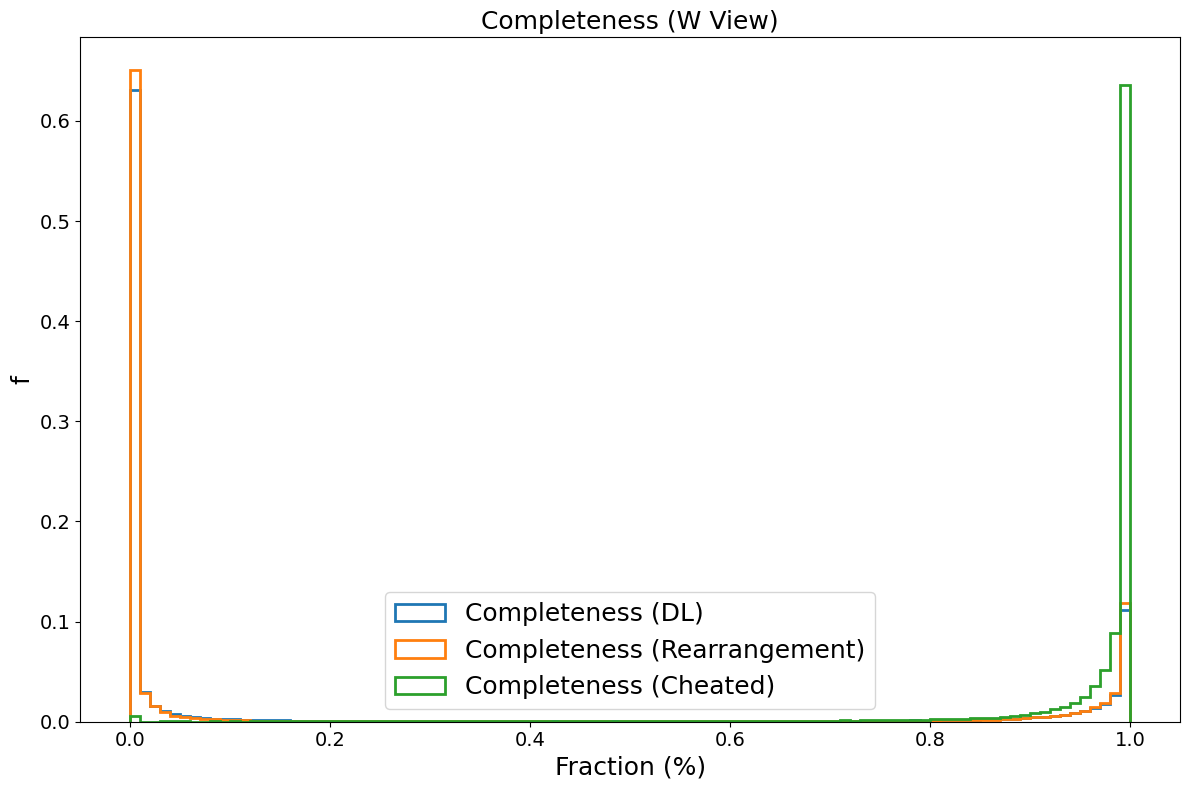

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [23]:
for view in ["U", "V", "W"]:
    completeness = [
        ("Completeness (DL)", dl_df[(dl_df.success == 1) & (dl_df.trueNuHitsInSlice_U > 5)][f"nuSliceComp_{view}"]),
        ("Completeness (Rearrangement)", rearrange_df[(rearrange_df.success == 1) & (rearrange_df.trueNuHitsInSlice_U > 5)][f"nuSliceComp_{view}"]),
        ("Completeness (Cheated)", cheated_df[(cheated_df.success == 1) & (cheated_df.trueNuHitsInSlice_U > 5)][f"nuSliceComp_{view}"]),
    ]
    plot_percentage(f"Completeness ({view} View)", completeness, f"completeness_{view}_true")

Completeness (U View): 0.91 +/- 0.15
Completeness (V View): 0.91 +/- 0.15
Completeness (W View): 0.96 +/- 0.12


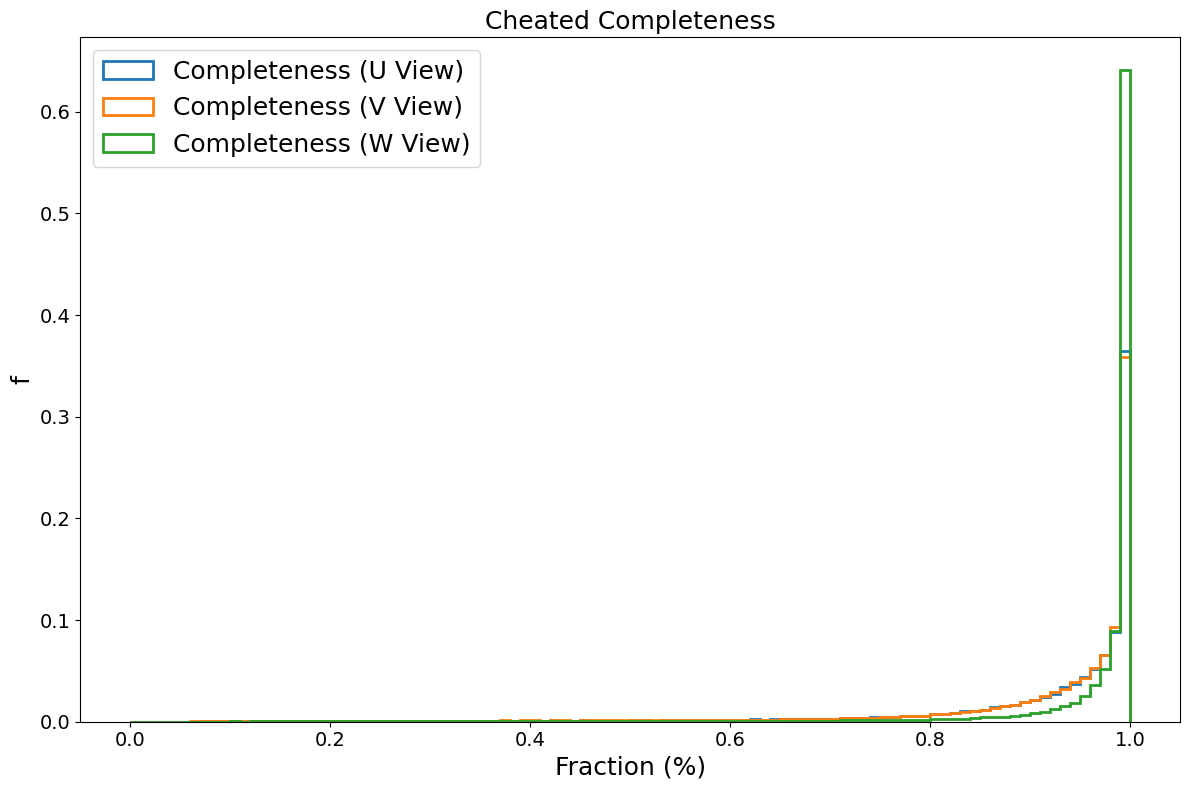

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [24]:
cheated_completeness = [
    ("Completeness (U View)", cheated_df[(cheated_df.success == 1) & (cheated_df.sliceNuHits_U > 5)]["nuSliceComp_U"]),
    ("Completeness (V View)", cheated_df[(cheated_df.success == 1) & (cheated_df.sliceNuHits_V > 5)]["nuSliceComp_V"]),
    ("Completeness (W View)", cheated_df[(cheated_df.success == 1) & (cheated_df.sliceNuHits_W > 5)]["nuSliceComp_W"]),
]

plot_percentage("Cheated Completeness", cheated_completeness, "cheated_completeness")


DL: 0.82 +/- 0.20
Rearrangement: 0.83 +/- 0.20
Cheated: 0.77 +/- 0.23


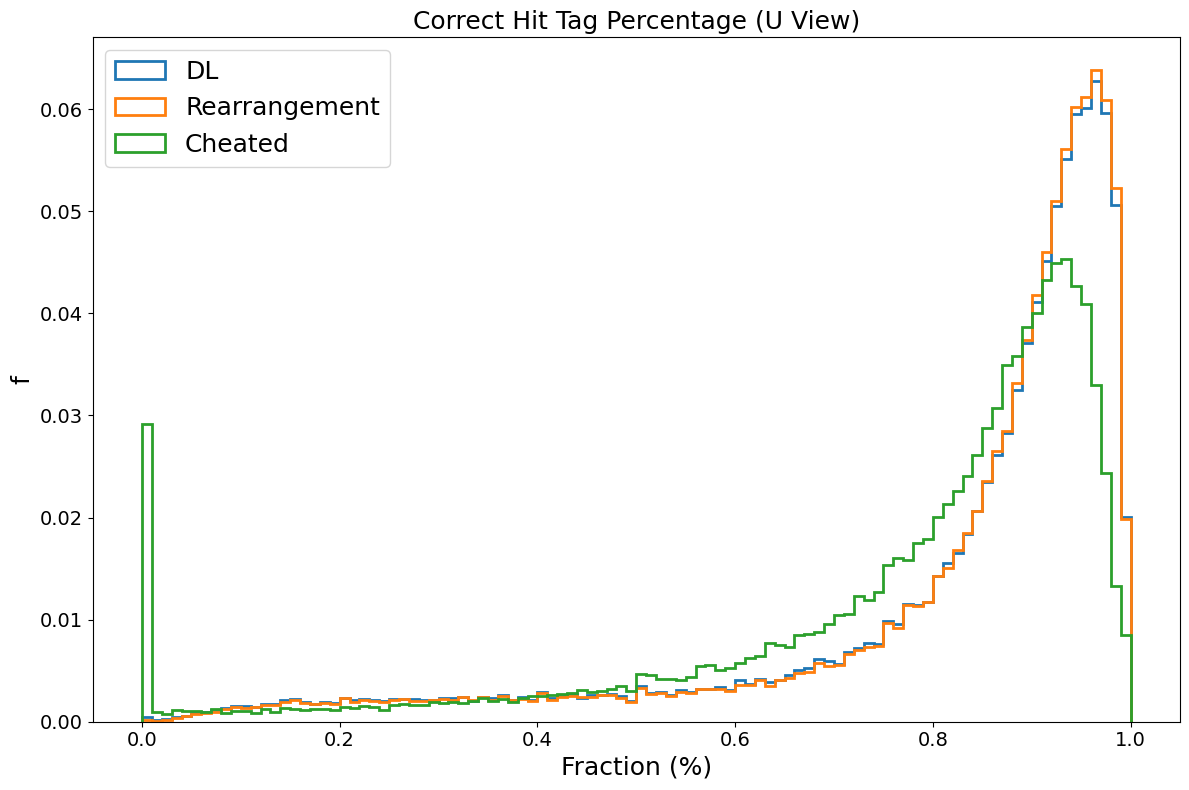

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DL: 0.83 +/- 0.22
Rearrangement: 0.84 +/- 0.22
Cheated: 0.83 +/- 0.17


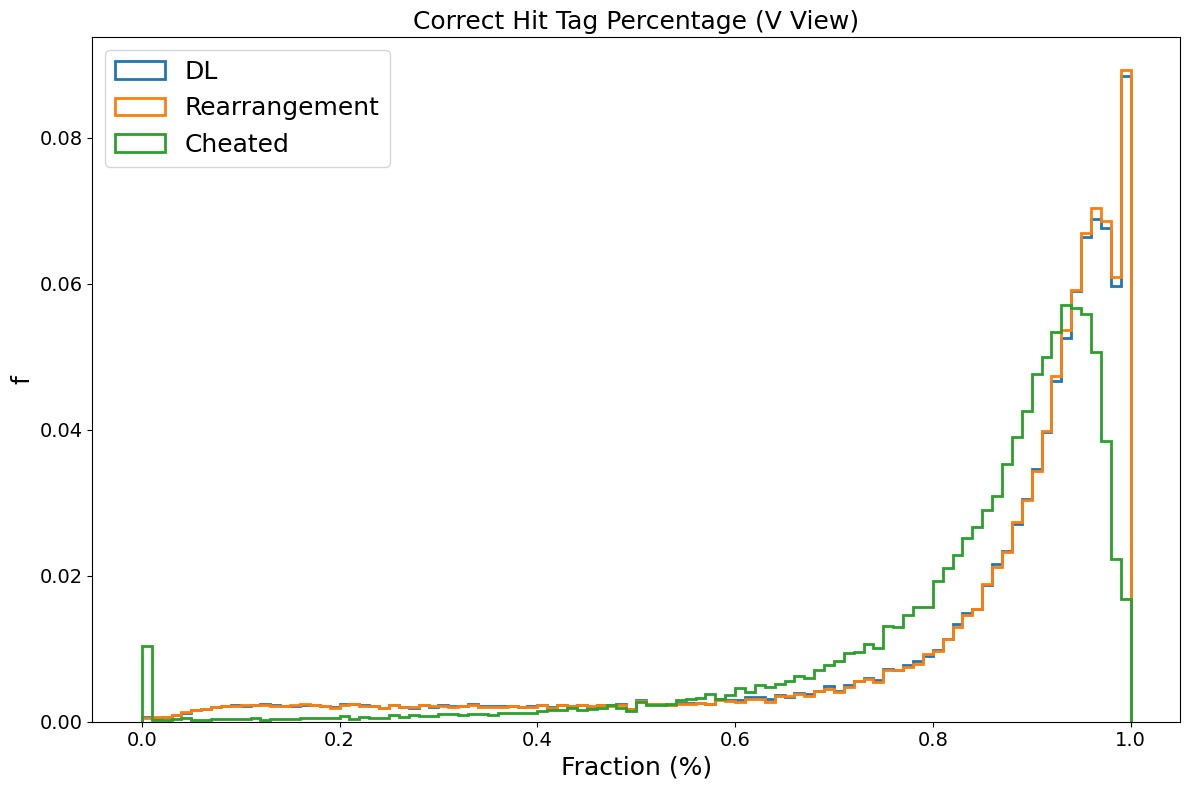

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DL: 0.84 +/- 0.23
Rearrangement: 0.84 +/- 0.23
Cheated: 0.85 +/- 0.18


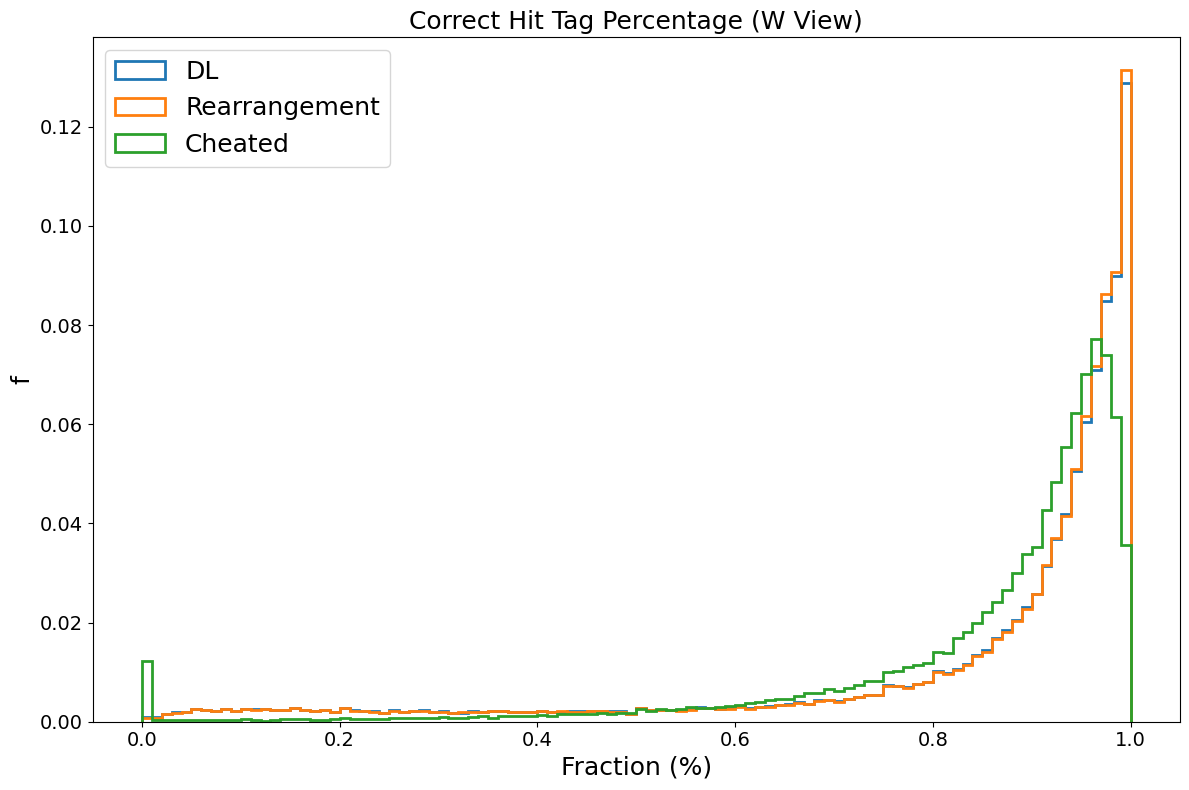

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DL: 0.85 +/- 0.15
Rearrangement: 0.86 +/- 0.15
Cheated: 0.79 +/- 0.20


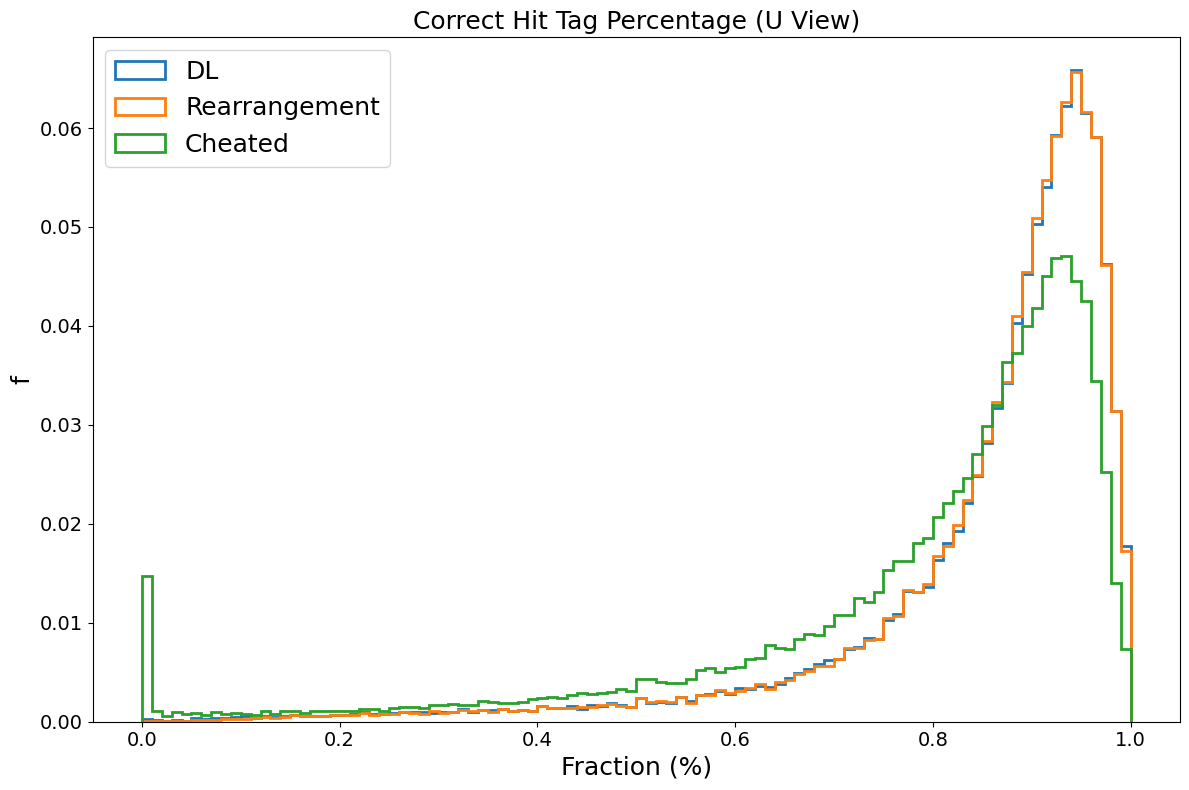

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DL: 0.88 +/- 0.14
Rearrangement: 0.89 +/- 0.13
Cheated: 0.84 +/- 0.16


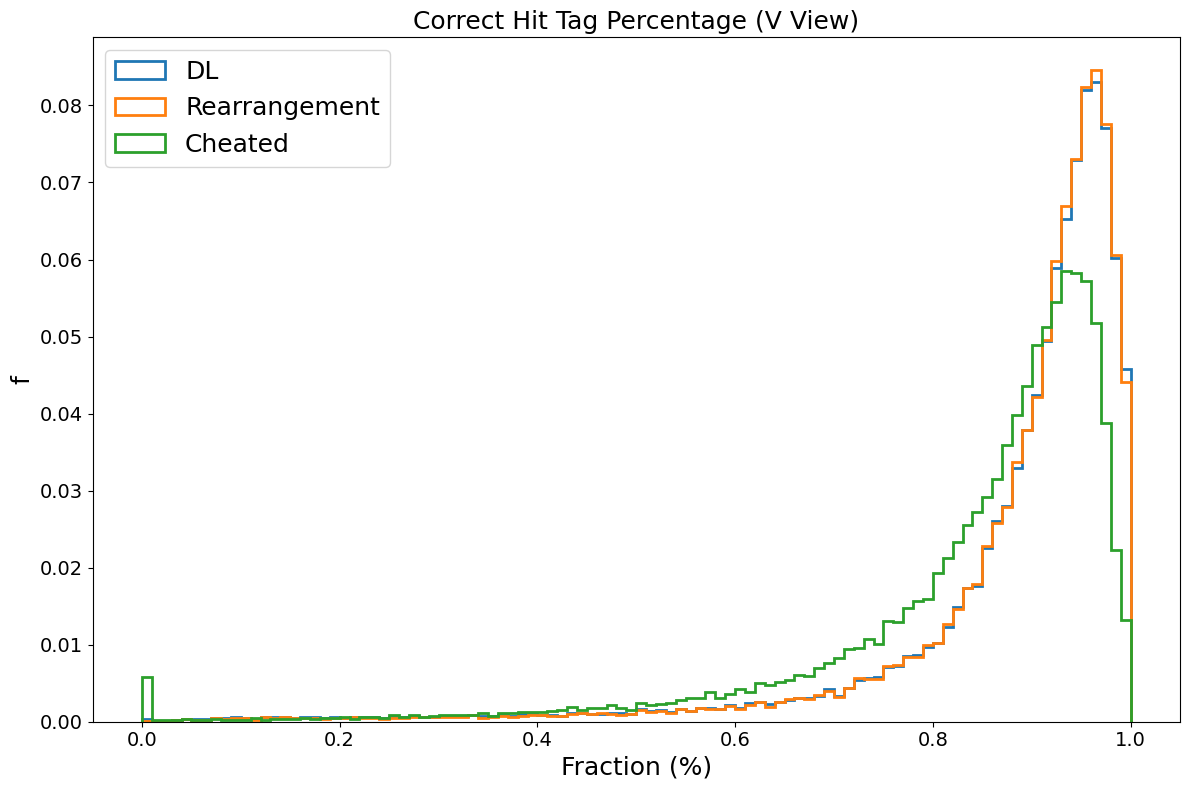

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DL: 0.89 +/- 0.16
Rearrangement: 0.89 +/- 0.15
Cheated: 0.86 +/- 0.16


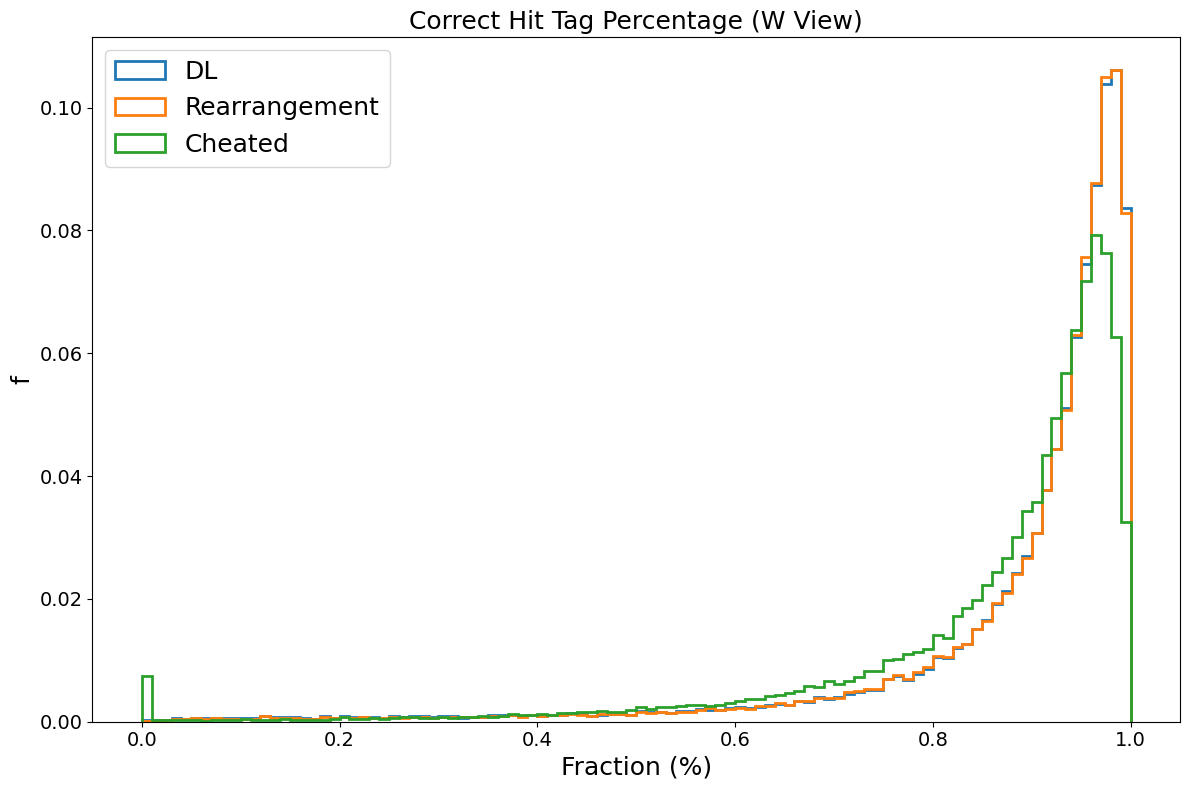

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [42]:
for view in ["U", "V", "W"]:
    hit_tag_pct = [
        ("DL", dl_df[(dl_df.success == 1) & (dl_df.sliceNuHits_U > 5)][f"hitTagCorrectPct_{view}"]),
        ("Rearrangement", rearrange_df[(rearrange_df.success == 1) & (rearrange_df.sliceNuHits_U > 5)][f"hitTagCorrectPct_{view}"]),
        ("Cheated", cheated_df[(cheated_df.success == 1) & (cheated_df.sliceNuHits_U > 5)][f"hitTagCorrectPct_{view}"]),
    ]
    plot_percentage(f"Correct Hit Tag Percentage ({view} View)", hit_tag_pct, f"hit_tag_pct_{view}")

for view in ["U", "V", "W"]:
    hit_tag_pct = [
        ("DL", dl_df[(dl_df.success == 1) & (dl_df.sliceNuHits_U > 50)][f"hitTagCorrectPct_{view}"]),
        ("Rearrangement", rearrange_df[(rearrange_df.success == 1) & (rearrange_df.sliceNuHits_U > 50)][f"hitTagCorrectPct_{view}"]),
        ("Cheated", cheated_df[(cheated_df.success == 1) & (cheated_df.sliceNuHits_U > 50)][f"hitTagCorrectPct_{view}"]),
    ]
    plot_percentage(f"Correct Hit Tag Percentage ({view} View)", hit_tag_pct, f"hit_tag_pct_{view}")


DL: 117.56 +/- 220.39
Rearrangement: 89.69 +/- 182.66
Cheated: 42.13 +/- 94.10


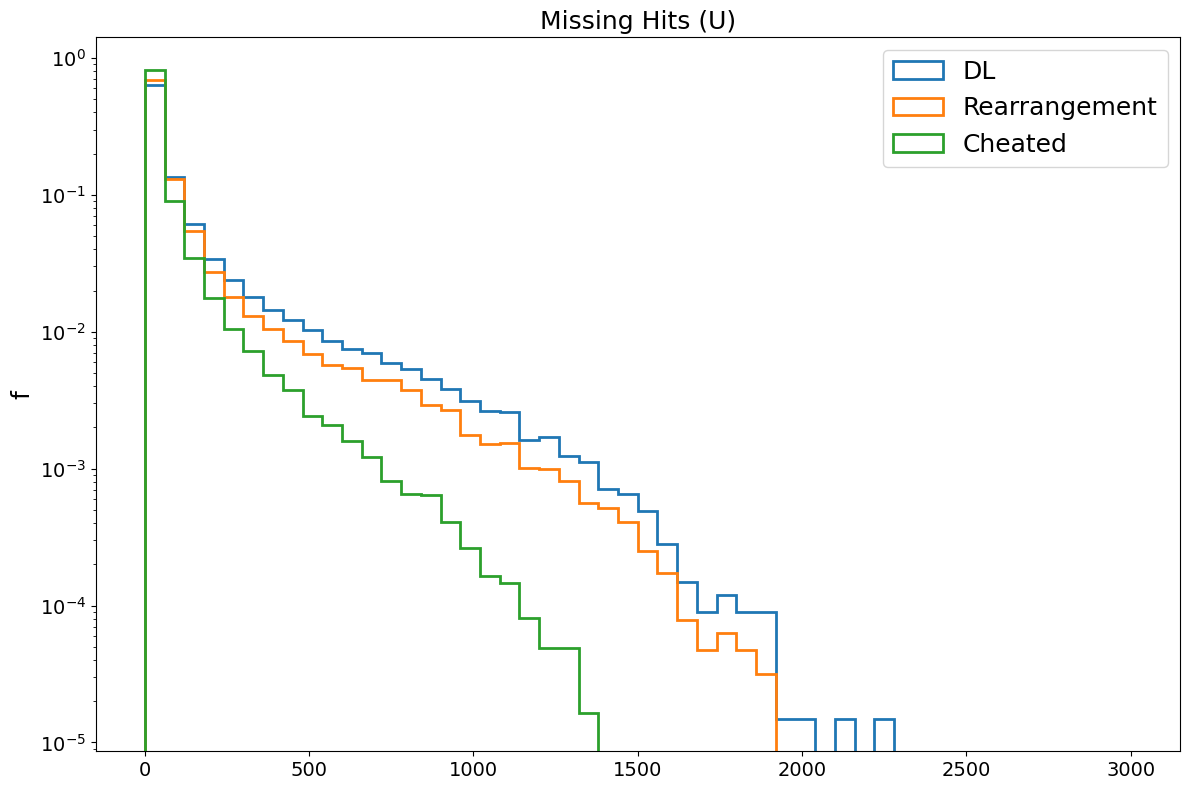

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DL: 132.37 +/- 236.08
Rearrangement: 99.23 +/- 193.25
Cheated: 45.41 +/- 98.08


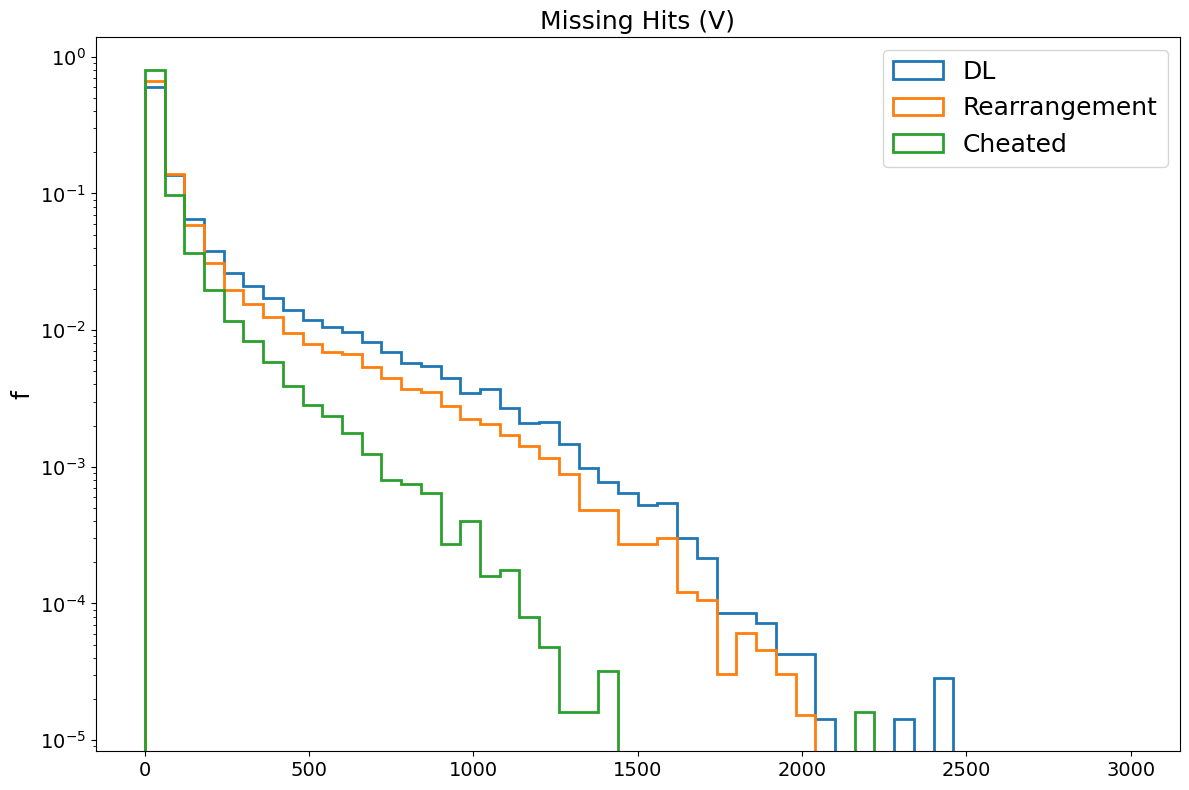

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DL: 111.12 +/- 269.50
Rearrangement: 64.12 +/- 191.41
Cheated: 25.30 +/- 90.84


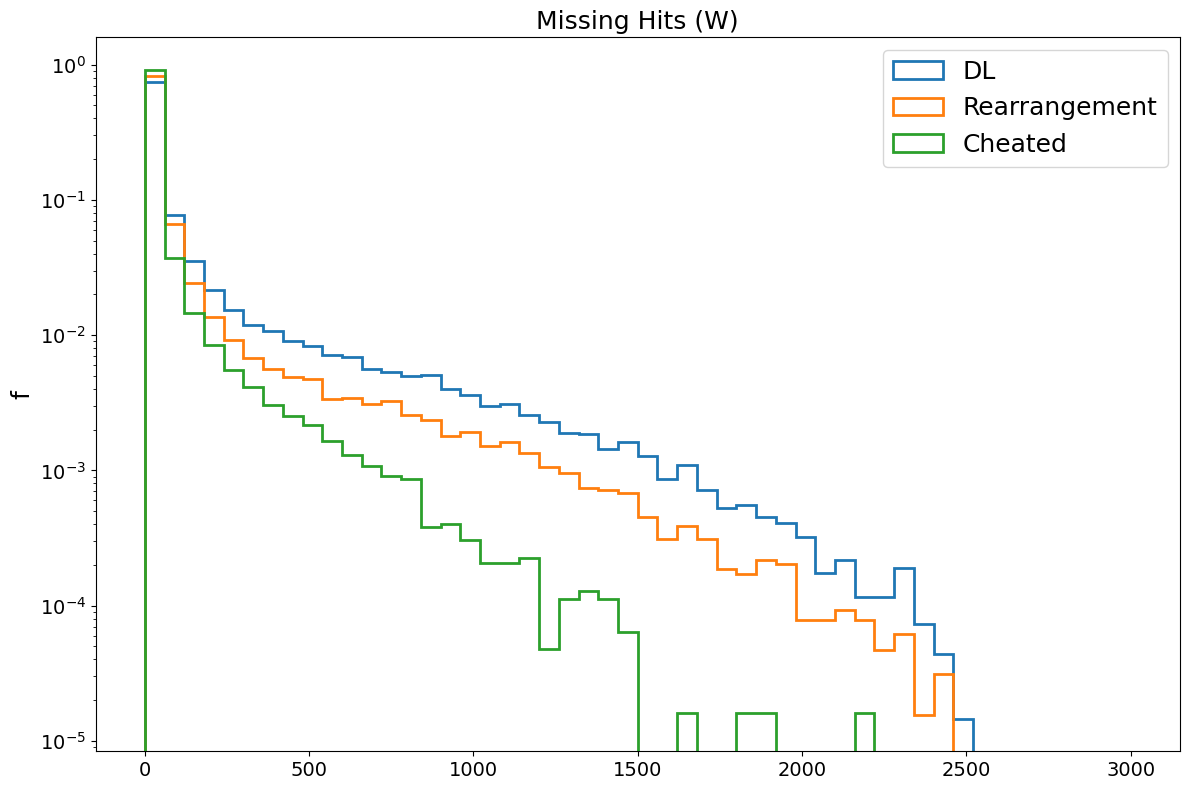

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [41]:
for view in ["U", "V", "W"]:
    missing_hits = []

    missing_hits.append(
        ("DL", dl_df[(dl_df.success == 1) & (dl_df[f"sliceNuHits_{view}"] >= 50)][f"missingNuHits_{view}"]),
    )
    missing_hits.append(
        ("Rearrangement", rearrange_df[(rearrange_df.success == 1) & (rearrange_df[f"sliceNuHits_{view}"] >= 50)][f"missingNuHits_{view}"]),
    )
    missing_hits.append(
        ("Cheated", cheated_df[(cheated_df.success == 1) & (cheated_df[f"sliceNuHits_{view}"] >= 50)][f"missingNuHits_{view}"]),
    )

    plot_range(f"Missing Hits ({view})", missing_hits, f"missing_hits_{view}", 0, 3000, 51, logy=True)